# **Importing the necessary libraries and dividing the data set into training/testing**

> 188 adet sütun verisi mevcuttur. Bu verilerden ilk 187 adeti EKG giriş sinyaline ait sayısal giriş değerleridir. 188. (son sütun) ise, EKG sinyalinin türünü ifade etmektedir.

In [1]:
import numpy as np
import pandas as pd

#Giriş Verileri Eğitim İçin Ayrılıyor
train =pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv")  
X_train=np.array(train)[:,:187]
y_train=np.array(train)[:,187]

#Giriş Verileri Test İçin Ayrılıyor 
test =pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv")
X_test=np.array(test)[:,:187]
y_test=np.array(test)[:,187]

# **Training and prediction processes in Bayesian algorithm**

In [2]:
from sklearn.naive_bayes import CategoricalNB
gnb = CategoricalNB()         #Bayes modeli
gnb.fit(X_train, y_train)     #Eğitme
y_pred = gnb.predict(X_test)  #Tahmin işlemi

# **Confusion matrix representation**

> **Hata matrisini** (confusion matrix) kullanarak modelin başarısı ölçülür. Sırasıyla: 

1. **"sklearn.metrics”** kütüphanesinden confusion_matrix özelliği yüklenir. 
2. Hata matrisini görüntüleyebilmek için gerekli olan **"seaborn"** kütüphanesi yüklenir. 
3. Hata matrisindeki grafikleri çizebilmek için matplotlib kütüphanesi içerisinde yer alan **"pyplot"** fonksiyonu yüklenir.
4. **“cm değişkeni”** ile oluşturulan hata matrisinin satır (y_test) ve sütunları (y_pred) oluşturulur. index ve colums değişkenleri kullanarak hata matrisinde yer alacak olan metinler belirlenir.
5. **"cm_df"** değişkeni ile “y_test” ve “y_pred” değerlerinin veri çerçevesine (DataFrame) aktarılması sağlanır. 
6. **“plt.figure”** komutu ile 10x6 cm çerçeve boyutunda boş bir çizim ekranı açılır.
7. **“sns.heatmap"** komutu ile oluşturulan veri çerçevesini renkli olarak çizilir. Burada **annot=True** ile sayısal değerler gösterilirken, **fmt=”d”** sayısal değerler tam sayı olarak ve **cmap=”YlGnBu”** ile yeşil gri ve mavi renkler ile gösterilmiştir. 

<Axes: >

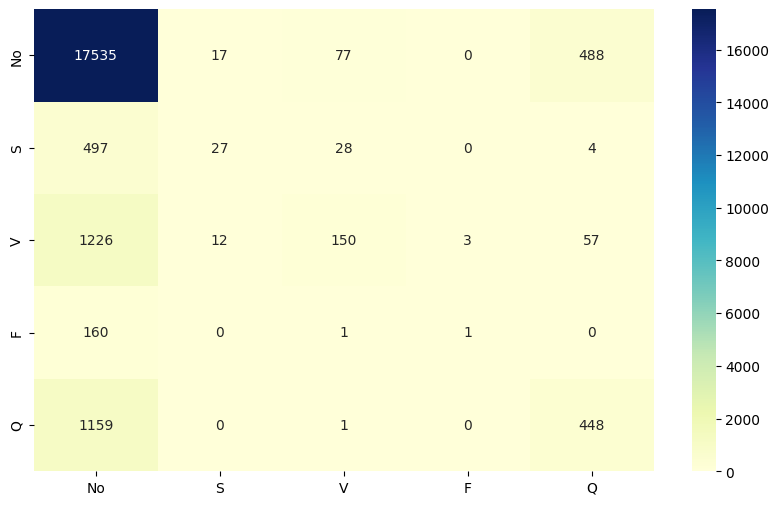

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm= confusion_matrix(y_test,y_pred)
index = ['No','S','V','F','Q'] 
columns = ['No','S','V','F','Q']   
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True,fmt="d",cmap="YlGnBu")

# **Model accuracy determination**

In [4]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8296103421497419
